In [1]:
# Install any missing libraries
!pip install pandas matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Load the stock data (example for Apple)
df = pd.read_csv('/content/KO_20_years_data_CocaCola.csv')

# Check the first few rows of the dataset
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-01,22.400000,22.430000,22.150000,22.320000,12.215519,7076200
1,2004-09-02,22.320000,22.735001,22.275000,22.695000,12.420754,10707400
2,2004-09-03,22.719999,22.940001,22.705000,22.745001,12.448124,9841800
3,2004-09-07,22.850000,22.900000,22.575001,22.825001,12.491906,8490200
4,2004-09-08,22.674999,22.674999,21.700001,21.725000,11.889886,23239400


In [4]:
# Get data shape
print("Data Shape: ", df.shape)

# Check the size of the dataset in MB
df_memory = df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"Data Size: {df_memory:.2f} MB")


Data Shape:  (5034, 7)
Data Size: 0.55 MB


In [5]:
# Check column names and data types
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5034 non-null   object 
 1   Open       5034 non-null   float64
 2   High       5034 non-null   float64
 3   Low        5034 non-null   float64
 4   Close      5034 non-null   float64
 5   Adj Close  5034 non-null   float64
 6   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.4+ KB


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [6]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get the time period covered in the dataset
start_date = df['Date'].min()
end_date = df['Date'].max()

print(f"Data covers the period from {start_date} to {end_date}")


Data covers the period from 2004-09-01 00:00:00 to 2024-08-30 00:00:00


## Exploratory Data Analysis for Coca Cola Data

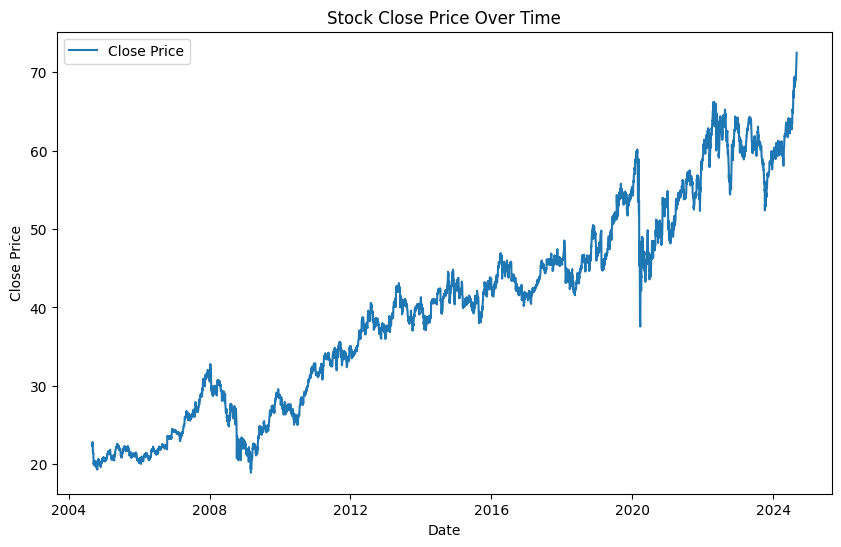

In [7]:
# Plot the 'Close' price over time
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [8]:
# Get summary statistics of the dataset
df.describe()


,Date,Open,High,Low,Close,Adj Close,Volume
count,5034,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,2014-08-30 21:58:25.601906944,39.991927,40.265184,39.712435,39.995569,31.544593,1.579258e+07
min,2004-09-01 00:00:00,19.075001,19.514999,18.719999,18.924999,10.638293,2.996300e+06
25%,2009-08-31 06:00:00,27.757499,28.052499,27.575001,27.861250,17.403641,1.103910e+07
50%,2014-08-31 00:00:00,40.790001,41.000000,40.529999,40.785000,29.901623,1.398780e+07
75%,2019-08-29 18:00:00,48.495000,48.914999,48.177500,48.487501,41.717748,1.832755e+07
max,2024-08-30 00:00:00,72.199997,72.570000,71.779999,72.470001,72.470001,1.241690e+08
std,NaN,12.979188,13.056397,12.897828,12.981815,15.318057,7.494950e+06


In [9]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values or handle them as per the need
df.dropna(inplace=True)

# Confirm changes
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
# Example: Adding a 20-day moving average
df['MA20'] = df['Close'].rolling(window=20).mean()

# Check the new feature
df[['Date', 'Close', 'MA20']].tail()


,Date,Close,MA20
5029,2024-08-26,70.839996,68.7330
5030,2024-08-27,71.500000,68.9240
5031,2024-08-28,71.750000,69.1745
5032,2024-08-29,72.050003,69.3790
5033,2024-08-30,72.470001,69.5360


In [11]:
# Target variable
target = 'Close'

# Features (excluding 'Date' and the target)
features = ['Open', 'High', 'Low', 'Volume', 'MA20']  # Add other engineered features as needed


In [12]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df[features]
y = df[target]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


## Exploratory Data Analysis for Pfizer Data

In [13]:
# Load the stock data (example for Apple)
df = pd.read_csv('/content/PFE_20_years_data_Pfizer.csv')

# Check the first few rows of the dataset
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-01,30.882353,31.015181,30.616697,30.692600,13.768596,15159577
1,2004-09-02,30.787476,31.110058,30.351044,31.024668,13.917562,17748622
2,2004-09-03,31.034157,31.356735,30.882353,30.882353,13.853722,14901768
3,2004-09-07,31.176472,31.309298,30.759012,31.062618,13.934580,14884272
4,2004-09-08,31.062618,31.204933,30.958254,31.091082,13.947354,12681939


In [14]:
# Get data shape
print("Data Shape: ", df.shape)

# Check the size of the dataset in MB
df_memory = df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"Data Size: {df_memory:.2f} MB")

# Check column names and data types
df.info()

# Check for missing values
df.isnull().sum()

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get the time period covered in the dataset
start_date = df['Date'].min()
end_date = df['Date'].max()

print(f"Data covers the period from {start_date} to {end_date}")

Data Shape:  (5034, 7)
Data Size: 0.55 MB


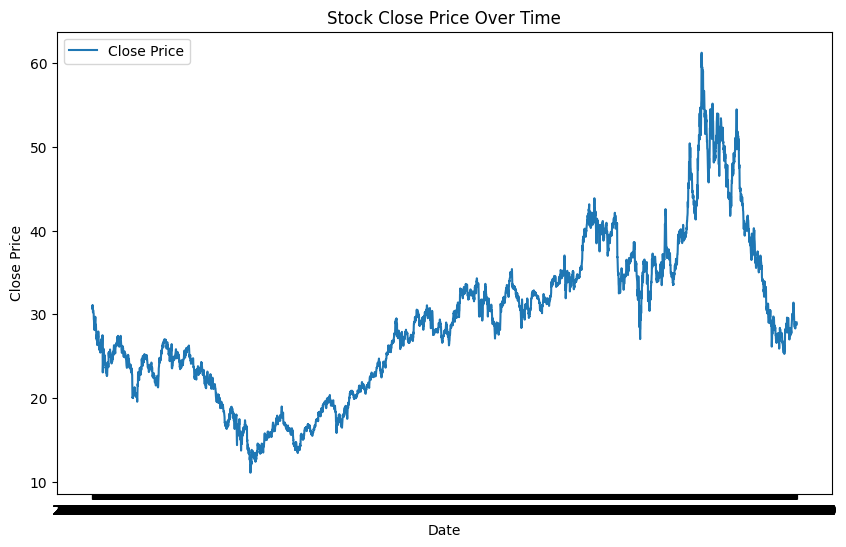

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [15]:
# Plot the 'Close' price over time
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Get summary statistics of the dataset
df.describe()

# Check for missing values
df.isnull().sum()

# Drop rows with missing values or handle them as per the need
df.dropna(inplace=True)

# Confirm changes
df.isnull().sum()
